# **Statistics for Angle to ablation Analysis**
(Stats_Angles2Ablation) by Stephane Verger

## **What does this notebook contain**
This notebook proposes various statistical analysis of the data (descriptive and inferential), obtained from the quantification output of the Angle2Ablation.ijm macro, part of the MT_Angle2Ablation_Workflow (https://github.com/VergerLab/MT_Angle2Ablation_Workflow).

* **1- Single condition/timepoint:** Display data, mean angle and anisotropy, histogram representation, and data distrubution skewness and mode.
* **2- Multiple condition and time points comparisons:** Same as (1- Single condition/timepoint) but does it for multiple subfolders (corresponding to different condition/timepoints) in a folder. Then displays boxplots of the of angles and anisotropies comparing different samples and generate statistical tests to test the significance of difference between samples.
* **3- Timelapses...Todo**


## **How to use this notebook**
The principle is that you can run pieces of code that perform the diferent steps of the statistical analysis, one by one. In this case you will first load the required python packages, and display their version number. You will then load your data (actually define the path), display the content of your data, start to run some descriptive statistic of your data, etc. 
Follow the instructions in the notebook step by step, keeping in mind that sometimes some cells can be skipped. 

Running a cell containing a peice of code is simply done by clicking on the grayed area (selected cell will appear outlined in blue) and pressing Shift+Enter. This will execute the content of the cell.

To discover the basics of how to run a jupyter notebook, you can also try: https://try.jupyter.org. Click on "Try Classic Notebook".

### **Load required packages**
Before starting, load packages and functions (click on the cell below and hit enter+shift to run it).
Then run each cell one by one depending on the analysis you want to perform.

In [1]:
import os
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

To confirm that the packages were loaded properly and for record keeping of the actual conditions of the analysis, you can show the version number of the packages, the python version and the system used. To do so, run the cell below.

In [2]:
%load_ext watermark
%watermark -d -t -v -m -p pip,jupyterlab,pandas,numpy,matplotlib,seaborn,scipy,watermark

2020-11-17 15:31:48 

CPython 3.7.9
IPython 7.19.0

pip 20.2.4
jupyterlab 2.1.5
pandas 1.1.3
numpy 1.19.2
matplotlib 3.2.2
seaborn 0.10.1
scipy 1.5.0
watermark 2.0.2

compiler   : GCC 7.3.0
system     : Linux
release    : 4.15.0-1100-oem
machine    : x86_64
processor  : x86_64
CPU cores  : 8
interpreter: 64bit


## **1. Single condition/timepoint**
This part of the notebook is dedicated to examine each data groups descriptive statistics independently. It can be useful before comparative analysis, but not mandatory. Similar data is automatically generated for each compared conditions in "2- Multiple condition and time points comparisons". This part of the notebook can also be useful if you want to modify part of the analysis pipeline to test different functions and paramaters by modifying the code (e.g. for the histogram layout).

!!!Run at least once each cell, because a number of these cells are defining functions (def), which are used later in the notebook.

### **1.1. Load data**
In the cell below, define the full path to the file containing all the data to analyse (All_..._Angle2Ablation.txt). (If you are trying the analysis with the pre-loaded test data on binder, directly run the cell below).

1. First, in the cell below, erase the current path "/Home/..."
2. Keep the two quotes '.
   - On LINUX, MAC or if you run the notebook on binder, also keep the first slash (/). In the cell, you should have (single_file_path = '/').
   - On windows you should instead have something like (single_file_path = 'C:\\'). Use antislash (\\) in windows.
3. Place your mouse cursor and click just before the second quote mark (single_file_path = '/[here]' or single_file_path = 'C:\\[here]').
4. Then press tab. A list of the subdirectories will drop down. Select the one containing the folder with your data. Continue until you finally select the actual file that you want to analyse (All_..._Angle2Ablation.txt). If you are using binder, start the path with "/home/jovyan/".
5. Once your path is complete (The cell content should look like "single_file_path ='/home/jovyan/TestData/Test_file/All_Test_file_Angle2Ablation.txt'"), run the cell.

!!! Avoid spaces in the names of the folders!!!

In [3]:
single_file_path ='/home/jovyan/TestData/Test_file/All_Test_file_Angle2Ablation.txt'

Then run the following cell to extracts the folder name and path for figure labelling.

In [4]:
single_folder_path = os.path.dirname(single_file_path)
single_folder_name = os.path.basename(single_folder_path) 
print (single_folder_path)
print (single_folder_name)

/home/stephane/Research/Experiments/Ablation_Angle_Analysis/From_github/MT_Angle2Ablation_Workflow-master/TestData/response
response


Choose where the output will be saved. Most of the cells that you will run below will generate text output or plots. These will be automatically saved as you run them. Below define the folder in which it will be saved. We suggest to use the same folder that contains the file you analyse. You can for instance directly copy the same path as for (single_file_path) but removing the last item (All_..._Angle2Ablation.txt), and making sure to keep the last slash or antislash depending on the operating system used. If you run the notebook on binder, directly use the pre-loaded path.

In [5]:
single_output_path = '/home/jovyan/TestData/Test_file/'

Generate the output text file. After running the cell below you can check if the file has been generated in the specified output folder and if it contains prelininary information about the analysis. It will then be appended with the results generated below.

In [6]:
# Define log file name and path 
single_output_logFilePathName = str(single_output_path) + 'Log_' + str(single_folder_name) + '_Stats_Angle2ablation.txt'

# generate and write in the log .txt file
fLogSingle = open(single_output_logFilePathName, 'w')
fLogSingle.write('Stats_Angle2Ablation "single" analysis\n')
fLogSingle.write('File analysed and path:\n')
fLogSingle.write(single_file_path + '\n')
fLogSingle.close()

### **1.2. Display the data in a table**
Show content of the file loaded above

In [7]:
single_data = pd.read_csv(single_file_path, sep = "\t")
single_data

,Genotype/condition,Sample Number,CellNumber,FibrilTool Angle,Drawn Line Angle,Raw angle,Absolute angle,Acute absolute angle to ablation,Anisotropy
0,response,1,1,41.9872,29.5115,12.4757,12.4757,12.4757,0.1419
1,response,1,2,36.0274,29.0546,6.9728,6.9728,6.9728,0.1493
2,response,1,3,33.6901,21.3706,12.3194,12.3194,12.3194,0.0945
3,response,1,4,22.3801,1.1935,21.1866,21.1866,21.1866,0.1572
4,response,1,5,42.8789,29.1481,13.7308,13.7308,13.7308,0.1533
5,response,1,6,33.6901,35.5377,-1.8476,1.8476,1.8476,0.0702
6,response,2,1,28.6105,20.2249,8.3856,8.3856,8.3856,0.2459
7,response,2,2,22.6199,22.3801,0.2397,0.2397,0.2397,0.1345
8,response,2,3,37.2348,26.8869,10.3479,10.3479,10.3479,0.2523
9,response,2,4,27.8973,16.4769,11.4204,11.4204,11.4204,0.1834


### **1.3. Descriptive statistics**

Calculate the number of samples (count), mean value, standard deviation, lowest and highest values (min/max), and percentiles (50% = median) of the angle and anisotropy values.
The first generates the fonction to calculate and save the output. The 2nd and 3rd cell apply the function to calculate the descriptive statistics for the angles and anisotropy values. respectively

In [8]:
def DescriptiveStatistics(DataFile, value, title, log):
    # Descriptive statistics
    Desc_stats = DataFile[value].describe()

    # Write output to log file
    log.write('\n\n===\nDescriptive statistics on "' + value + '" of "' + title + '"\n===\n')
    log.write(str(Desc_stats))
    print(Desc_stats)

For angles

In [9]:
fLogSingle = open(single_output_logFilePathName, 'a') # Open the log file to save output
DescriptiveStatistics(single_data, 'Acute absolute angle to ablation', single_folder_name, fLogSingle) # Run the function
fLogSingle.close() # Close and save the output log file 

count    12.000000
mean      9.510075
std       5.519996
min       0.239700
25%       7.147775
50%       9.366750
75%      12.358475
max      21.186600
Name: Acute absolute angle to ablation, dtype: float64


For anisotropies

In [10]:
fLogSingle = open(single_output_logFilePathName, 'a')
DescriptiveStatistics(single_data, 'Anisotropy', single_folder_name, fLogSingle)
fLogSingle.close()

count    12.000000
mean      0.168858
std       0.057908
min       0.070200
25%       0.140050
50%       0.155250
75%       0.216650
max       0.252300
Name: Anisotropy, dtype: float64


### **1.4. Make histograms of angles**
This cell generates one regular and one polar histogram diplaying the distribution of the angles. !!! Both histogram display the same data !!!
The figures generated are automatically saved as .svg. This allows you afterwards to easily open and edits some aspects of the figure (Legends, axis names, colors,...) in your favorite vector graphic editor (e.g. Inkscape or illustrator). It will appear as a single object that you can "ungroup" into its different components.

In [11]:
def makeAnglesHistogram(DataFile, value, title, log, outPath):
    #figure parameters
    fig = plt.figure()

    # Data
    HistAngles = DataFile[value]
    bins = np.linspace(0, 90, 10) # To change the number of histogram bin (bars).
    N = 9
    theta = np.linspace(0.0, 0.5 * np.pi, N, endpoint=False)
    radii = plt.hist(HistAngles, bins=bins)[0].astype(int)/HistAngles.count()
    width = 0.5 * np.pi / N

    # Classical histogram
    ax1 = plt.subplot(121)
    #sns.set(rc={'figure.figsize':(10,5)})
    sns.distplot(HistAngles, bins=bins, rug=True)
    ax1.set_title(title) # + ', (N=' + str(len(HistAngles)) + ' cells)', fontsize=24) # To change the figure title
    ax1.set_xlabel('Angles(degree)', fontsize=30) # To change the axis labels and font size
    ax1.set_ylabel('Frequency', fontsize=30) # To change the axis labels and font size
    ax1.set_xlim(0,90)

    # polar histogram
    ax2 = plt.subplot(122, projection='polar')
    bars = ax2.bar(theta, radii, width=width, bottom=0.0, align = 'edge', edgecolor = 'k')
    ax2.set_xlim(0,0.5 * np.pi)
    for r, bar in zip(radii, bars):
        bar.set_facecolor(plt.cm.viridis(r / 0.5))
        bar.set_alpha(0.5)

    # Saving output
    FigNamePath = outPath + title + '_' + value + '_histogram.svg'
    fig.savefig(FigNamePath, bbox_inches = 'tight', facecolor='w')
    log.write('\n\n===\nHistogram of "' +  title + '_' + value  + '" was generated\n===\n')
    log.write('Path: ' + FigNamePath + '\n===')

    plt.tight_layout()
    plt.show()

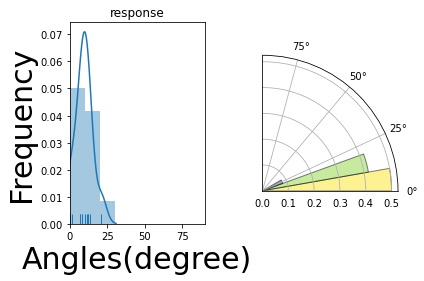

In [12]:
fLogSingle = open(single_output_logFilePathName, 'a')
makeAnglesHistogram(single_data, 'Acute absolute angle to ablation', single_folder_name, fLogSingle, single_output_path)
fLogSingle.close()

### **1.5. Make box plots of angles and anisotropies**
Generates boxplot overlayed with stripplot diplaying the distribution of the angles as well as anisotropes, for each sample in the condition. Can allow to check if most samples within a single condition behave in the same way.

The function defined here to make the box plot is the same one used in the multiple comparison later so the boxplot layout and  style can be changed here.

In [13]:
def makeStripBoxplot(DataFile, sample, value, title, log, outPath):
    #figure parameters
    fig = plt.figure()
    
    #Boxplot overlaid with stripplot
    ax1 = plt.subplot(111)
    #sns.set(rc={'figure.figsize':(10,10)})
    ax = sns.boxplot(x=sample, y=value, data=DataFile, color='w')
    ax = sns.stripplot(x=sample, y=value, data=DataFile, color='0.25')
    plt.title(title) # + ', N=' + str(len(sample)) + ' cells', fontsize=24) # To change the figure title
    plt.xlabel(sample, fontsize=30) # To change the axis labels and font size
    plt.ylabel(value, fontsize=30) # To change the axis labels and font size
    
    # Saving output
    FigNamePath = outPath + title + '_' +  value + '_stripboxplot.svg'
    fig.savefig(FigNamePath, bbox_inches = 'tight', facecolor='w')
    log.write('\n\n===\nStripboxplot of "' +  title + '_' + value  + '" was generated\n')
    log.write('Path: ' + FigNamePath + '\n===')

    plt.tight_layout()
    plt.show()

/home/stephane/Soft/miniconda2/envs/Stats_Angle2Abaltion/lib/python3.7/site-packages/ipykernel_launcher.py:20: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 


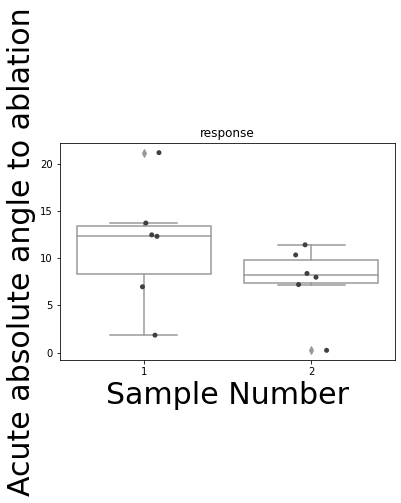

In [15]:
fLogSingle = open(single_output_logFilePathName, 'a')
makeStripBoxplot(single_data, 'Sample Number', 'Acute absolute angle to ablation', single_folder_name, fLogSingle, single_output_path)
fLogSingle.close()

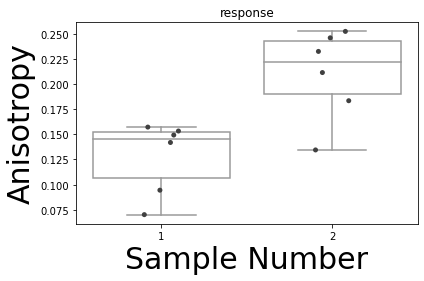

In [16]:
fLogSingle = open(single_output_logFilePathName, 'a')
makeStripBoxplot(single_data, 'Sample Number', 'Anisotropy', single_folder_name, fLogSingle, single_output_path)
fLogSingle.close()

### **1.6. Skweness**
"Skew: For normally distributed data, the skewness should be about zero. For unimodal continuous distributions, a skewness value greater than zero means that there is more weight in the right tail of the distribution. The function skewtest can be used to determine if the skewness value is close enough to zero, statistically speaking. If the p-value is lower than 0.05, it can be considered that the distribution is significantly skewed." From https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.skew.html

In [17]:
def SkewStatistics(DataFile, value, title, log):
    # Descriptive statistics
    skew=stats.skew(DataFile[value])
    statskew, pskew=stats.skewtest(DataFile[value])

    # Write output to log file
    log.write('\n\n===\nSkewness statistics on "' + value + '" of "' + title + '"\n===\n')
    log.write("skew " + str(skew) + "\npvalue " + str(pskew))
    print ("skew " + str(skew) + "\npvalue " + str(pskew))

In [18]:
fLogSingle = open(single_output_logFilePathName, 'a')
SkewStatistics(single_data, 'Acute absolute angle to ablation', single_folder_name, fLogSingle)
fLogSingle.close()

skew 0.2500292880872099
pvalue 0.6376122769846194


Done! You can take a look at the files generated in the defined output folder and proceed to the next step for comparison or timelapse analysis.

## **2. Multiple condition and time points comparisons:** 
This part of the notebook is dedicated to compare the quantifications obtained in the different conditions tested. It first runs the same descritpive staistics as in part 1 of the notebook, but does it automatically for multiple subfolders (corresponding to different condition/mutant/timepoints) in a Directory. In addition, it displays boxplots of the angles and anisotropies comparing different samples and generates inferential statistical tests to determine if there are significant difference between the compared samples.


### **2.1. Load data**
First define the path to the directory that contains all the conditions you want to compare. Below, in multiple_updir_path, as an example the pre-loaded to run the test data on binder is already defined. The "TestData" directory contains all the subfolder that will be analyzed. To run the analysis on your own data, change the path accordingly. Use tab to help navigation in the folders. Then don't forget to run the cell.

!!! All the output will automatically be saved in the directory defined below!!!

In [19]:
multiple_updir_path = '/home/jovyan/TestData/'

### **2.2. Generate and save descriptive statistics**
This large piece of code runs most of the actions performed in the first part of the notebook, but it does it automatically for all the files and subfolders in the directory defined above.


>>>Condition analyzed: Test_file
count    12.000000
mean     41.903542
std      19.807807
min      13.509400
25%      20.764100
50%      43.875450
75%      59.624900
max      64.253400
Name: Acute absolute angle to ablation, dtype: float64
count    12.000000
mean      0.168858
std       0.057908
min       0.070200
25%       0.140050
50%       0.155250
75%       0.216650
max       0.252300
Name: Anisotropy, dtype: float64
skew -0.3059710620476703
pvalue 0.5649860275941583


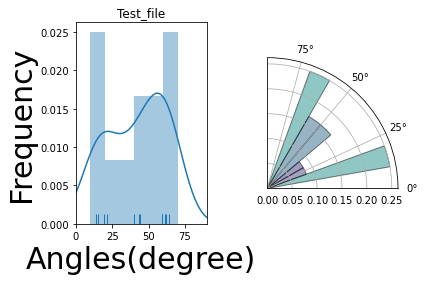


>>>Condition analyzed: response
count    12.000000
mean      9.510075
std       5.519996
min       0.239700
25%       7.147775
50%       9.366750
75%      12.358475
max      21.186600
Name: Acute absolute angle to ablation, dtype: float64
count    12.000000
mean      0.168858
std       0.057908
min       0.070200
25%       0.140050
50%       0.155250
75%       0.216650
max       0.252300
Name: Anisotropy, dtype: float64
skew 0.2500292880872099
pvalue 0.6376122769846194


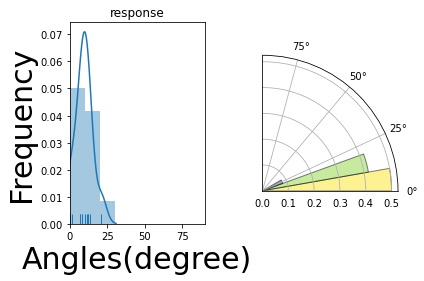

In [20]:
# Define log file name and path 
multiple_output_logFilePathName = str(multiple_updir_path) + 'Log_MultiComparison_Stats_Angle2ablation.txt'

# generate and write in the log .txt file
fLogMulti = open(multiple_output_logFilePathName, 'w')
fLogMulti.write('Stats_Angle2Ablation "Multiple comparison" analysis\n')
fLogMulti.write('Folder analysed and path:\n')
fLogMulti.write(multiple_updir_path + '\n')


multi_data = pd.DataFrame(columns = ['Genotype/condition', 'Sample Number', 'CellNumber', 'FibrilTool Angle', 'Drawn Line Angle', 'Raw angle', 'Absolute angle', 'Acute absolute angle to ablation', 'Anisotropy'])
# Find subdirectories containing the experiments/conditions to analyse
for dirname in sorted(os.listdir(multiple_updir_path)):
    dirpath = multiple_updir_path + dirname
    if os.path.isdir(dirpath):
        if ".ipynb_checkpoints" in dirname:
            print (".ipynb_checkpoints folder skipped\n\n")
        else:
            print ("\n>>>Condition analyzed: " + dirname)
            
            # Load data
            Result_file_name = 'All_' + dirname + '_Angle2Ablation.txt'
            fLogMulti.write('\n==================\nFile analysed:\n')
            fLogMulti.write(Result_file_name + '\n==================\n')
            data = pd.read_csv(dirpath + '/' + Result_file_name, sep = "\t")
            
            # Descriptive statistics
            DescriptiveStatistics(data, 'Acute absolute angle to ablation', dirname, fLogMulti)
            DescriptiveStatistics(data, 'Anisotropy', dirname, fLogMulti)
            
            # Skew
            SkewStatistics(data, 'Acute absolute angle to ablation', dirname, fLogMulti)
            
            # Histogram Angles
            # plt.figure(dirname + "angles")
            makeAnglesHistogram(data, 'Acute absolute angle to ablation', dirname, fLogMulti, multiple_updir_path)

            # Add the current subfolder name to the list of analyzed subfolder names
            multi_data = pd.concat([multi_data, data], ignore_index=True)

fLogMulti.close()

When running the piece of code above, we also agregate all the angles and anisotropy data form the different conditions into a new single table. Run the cell below to display new dataframe generated.

In [21]:
multi_data

,Genotype/condition,Sample Number,CellNumber,FibrilTool Angle,Drawn Line Angle,Raw angle,Absolute angle,Acute absolute angle to ablation,Anisotropy
0,Test_file,1,1,41.9872,162.8973,-120.9101,120.9101,59.0899,0.1419
1,Test_file,1,2,36.0274,20.6955,15.3319,15.3319,15.3319,0.1493
2,Test_file,1,3,33.6901,92.8624,-59.1723,59.1723,59.1723,0.0945
3,Test_file,1,4,22.3801,86.6335,-64.2534,64.2534,64.2534,0.1572
4,Test_file,1,5,42.8789,161.8962,-119.0173,119.0173,60.9827,0.1533
5,Test_file,1,6,33.6901,14.0362,19.6538,19.6538,19.6538,0.0702
6,Test_file,2,1,28.6105,15.1011,13.5094,13.5094,13.5094,0.2459
7,Test_file,2,2,22.6199,162.7585,-140.1387,140.1387,39.8613,0.1345
8,Test_file,2,3,37.2348,80.9097,-43.6749,43.6749,43.6749,0.2523
9,Test_file,2,4,27.8973,90.0000,-62.1027,62.1027,62.1027,0.1834


Generate boxplot to compare anisotropies and angles

/home/stephane/Soft/miniconda2/envs/Stats_Angle2Abaltion/lib/python3.7/site-packages/ipykernel_launcher.py:20: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 


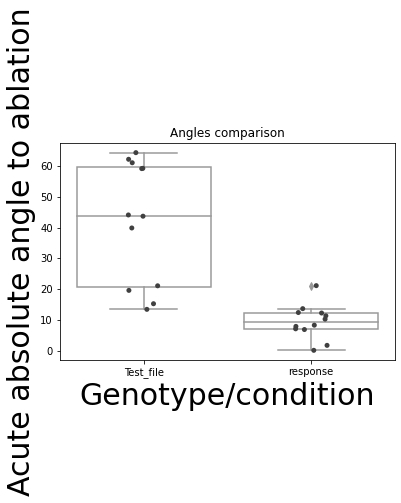

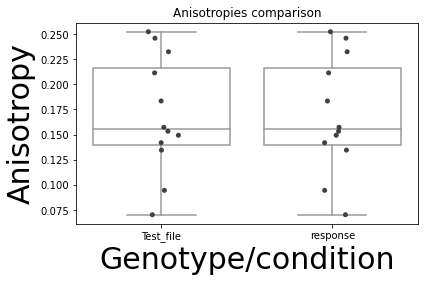

In [22]:
fLogMulti = open(multiple_output_logFilePathName, 'a')
makeStripBoxplot(multi_data, 'Genotype/condition', 'Acute absolute angle to ablation', 'Angles comparison', fLogMulti, multiple_updir_path)
makeStripBoxplot(multi_data, 'Genotype/condition', 'Anisotropy', 'Anisotropies comparison', fLogMulti, multiple_updir_path)
fLogMulti.close()

### **Run statistical tests to compare CMT reorientation and anisotropy after response to ablation**

Genotypes and conditions to compare

In [23]:
list_geno_cond = multi_data['Genotype/condition'].unique()
print ("There are " + str(len(list_geno_cond)) + " genotype and/or condition to compare:\n" + str(list_geno_cond))

There are 2 genotype and/or condition to compare:
['Test_file' 'response']


Running the cell below will run statistical tests for each pair of data, checking for normal distribution (Shapiro's test) and equal variance (Bartlett's test) to determine whether to run a T-test, Welch's test or a wilcoxon Wilcoxon rank sum test. 

Each pair of data will be tested with the most "adapted" test. Alternatively, in the following cell you can direcly run all the analysis with the defined test of your choice.

In [24]:
fLogMulti = open(multiple_output_logFilePathName, 'a')

#Loop to compare each samples
for A in list_geno_cond:
    result_A = np.where(list_geno_cond == A)
    for B in list_geno_cond:
        result_B = np.where(list_geno_cond == B)
        if result_A[0]<result_B[0]:            
            fLogMulti.write('\n>>>Comparison of "' + A + '" and "' + B + '"')
            print ('\n>>>Comparison of "' + A + '" and "' + B + '"')
            
            ###Process: 'Angles' and 'Anisotropy' for each comparison
            for col_name in ('Acute absolute angle to ablation', 'Anisotropy'):
                data_inputA = multi_data[multi_data['Genotype/condition'] == A][col_name]
                data_inputB = multi_data[multi_data['Genotype/condition'] == B][col_name]
                #print (str(A) + " -> " + str(col_name) + "\n" + str(data_inputA))
                #print (str(B) + " -> " + str(col_name) + "\n" + str(data_inputB))
                
                ###Test decision 
                ###t-test can be done if both samples populations a normally distributed and have equal variance
                ###
        
                ###Shapiro's test for normality
                ###test sample A and then samples B
                norm = []
                fLogMulti.write("\n- Shapiro's test for normality:")
                print ("- Shapiro's test for normality:")
                for sample, name in zip((data_inputA, data_inputB), (A, B)):
                    w, pnorm = stats.shapiro(sample)
                    #print (sample)
                    if pnorm>0.05:
                        norm.append(True)
                        fLogMulti.write("\n" + name + " " + col_name + " population IS normally distributed --> p-value is " + str(round(pnorm, 4)))
                        print (name + " " + col_name + " population IS normally distributed --> p-value is " + str(round(pnorm, 4)))
                    else:
                        norm.append(False)
                        fLogMulti.write("\n" + name + " " + col_name + " population is NOT normally distributed--> p-value is " + str(round(pnorm, 4)))
                        print (name + " " + col_name + " population is NOT normally distributed--> p-value is " + str(round(pnorm, 4)))
                        
                ### Determine "t-test or Welchs test" or "wilcoxon rank sum test"
                if norm[0] and norm[1] is True:
                    fLogMulti.write("\nBoth sample have normal distibution --> t-test or Welch's test\n")
                    print ("Both sample have normal distibution --> t-test or Welch's test\n")
            
                    ###Bartlett's test for equal variance (to determine between t-test and Welchs test)
                    fLogMulti.write("\n- Bartlett's test for equal variance")
                    print ("- Bartlett's test for equal variance")
                    t, pvar = stats.bartlett(data_inputA, data_inputB)
                    if pvar>0.05:
                        equalvar=True
                        fLogMulti.write("\nsamples have equal variance--> t-test")
                        print ("samples have equal variance--> t-test")
                    else:
                        equalvar=False
                        fLogMulti.write("\nsamples do not have equal variance--> Welch's test")
                        print ("samples do not have equal variance--> Welch's test")

                    ###t-test (Welch's if variances are unequal)
                    t2, pVal = stats.ttest_ind(data_inputA, data_inputB, equal_var=equalvar)

                ### If at least one sample has non normal population distribution: wilcoxon rank sum test
                else:
                    fLogMulti.write("\nAt least one sample does Not have normal distibution --> Wilcoxon rank sum test")
                    print ("At least one sample does Not have normal distibution --> Wilcoxon rank sum test")
                    statrank, pVal = stats.ranksums(data_inputA, data_inputB)
        
        
                ### Comparison test output
                if pVal>0.05:
                    fLogMulti.write("\n###################################################################\n--> " + 
                                    col_name + " are NOT significantly different --> p-value is " + str(round(pVal,10)) +
                                    "\n###################################################################\n")
                    print ("###################################################################\n--> " + 
                           col_name + " are NOT significantly different --> p-value is " + str(round(pVal,10)) +
                           "\n###################################################################\n")

                else:
                    fLogMulti.write("\n###################################################################\n--> " + 
                                    col_name + " are significantly different --> p-value is " + str(round(pVal,10)) +
                                    "\n###################################################################\n")
                    print ("###################################################################\n--> " + 
                           col_name + " are significantly different --> p-value is " + str(round(pVal,10)) +
                           "\n###################################################################\n")
                    
fLogMulti.close()


>>>Comparison of "Test_file" and "response"
- Shapiro's test for normality:
Test_file Acute absolute angle to ablation population is NOT normally distributed--> p-value is 0.0464
response Acute absolute angle to ablation population IS normally distributed --> p-value is 0.723
At least one sample does Not have normal distibution --> Wilcoxon rank sum test
###################################################################
--> Acute absolute angle to ablation are significantly different --> p-value is 0.0001096207
###################################################################

- Shapiro's test for normality:
Test_file Anisotropy population IS normally distributed --> p-value is 0.6541
response Anisotropy population IS normally distributed --> p-value is 0.6541
Both sample have normal distibution --> t-test or Welch's test

- Bartlett's test for equal variance
samples have equal variance--> t-test
###################################################################
--> Anisotropy are

In the cell below you can directly choose a single test for all the analysis.
We recommend to use the most permissive one in this case the non parametric wilcoxon rank sum test.
To change which test is applied, you can change the value assigned to "test" in the first line of the cell below.

In [25]:
test = 'Wilcoxon' # 't', 'Welch', 'Wilcoxon'

fLogMulti = open(multiple_output_logFilePathName, 'a')

#Loop to compare each samples
for A in list_geno_cond:
    result_A = np.where(list_geno_cond == A)
    for B in list_geno_cond:
        result_B = np.where(list_geno_cond == B)
        if result_A[0]<result_B[0]:            
            fLogMulti.write('\n>>>Comparison of "' + A + '" and "' + B + '"')
            print ('\n>>>Comparison of "' + A + '" and "' + B + '"')
            
            ###Process: 'Angles' and 'Anisotropy' for each comparison
            for col_name in ('Acute absolute angle to ablation', 'Anisotropy'):
                data_inputA = multi_data[multi_data['Genotype/condition'] == A][col_name]
                data_inputB = multi_data[multi_data['Genotype/condition'] == B][col_name]

                if test == 't':
                    equalvar=True
                    fLogMulti.write("\n--> t-test")
                    print ("--> t-test")
                if test == 'Welch':
                    equalvar=False
                    fLogMulti.write("\n--> Welch's test")
                    print ("--> Welch's test")

                ###t-test (Welch's if variances are unequal)
                t2, pVal = stats.ttest_ind(data_inputA, data_inputB, equal_var=equalvar)

                ### If at least one sample has non normal population distribution: wilcoxon rank sum test
                if test == 'Wilcoxon':
                    fLogMulti.write("\n--> Wilcoxon rank sum test")
                    print ("--> Wilcoxon rank sum test")
                    statrank, pVal = stats.ranksums(data_inputA, data_inputB)
        
                ### Comparison test output
                if pVal>0.05:
                    fLogMulti.write("\n###################################################################\n--> " + 
                                    col_name + " are NOT significantly different --> p-value is " + str(round(pVal,10)) +
                                    "\n###################################################################\n")
                    print ("###################################################################\n--> " + 
                           col_name + " are NOT significantly different --> p-value is " + str(round(pVal,10)) +
                           "\n###################################################################\n")

                else:
                    fLogMulti.write("\n###################################################################\n--> " + 
                                    col_name + " are significantly different --> p-value is " + str(round(pVal,10)) +
                                    "\n###################################################################\n")
                    print ("###################################################################\n--> " + 
                           col_name + " are significantly different --> p-value is " + str(round(pVal,10)) +
                           "\n###################################################################\n")
                    
fLogMulti.close()


>>>Comparison of "Test_file" and "response"
--> Wilcoxon rank sum test
###################################################################
--> Acute absolute angle to ablation are significantly different --> p-value is 0.0001096207
###################################################################

--> Wilcoxon rank sum test
###################################################################
--> Anisotropy are NOT significantly different --> p-value is 1.0
###################################################################

